In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
import math
import matplotlib.colors

In [144]:
data = pd.read_csv('football_data.csv',header=0)
data.head(5)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

# Data Cleaning and data preparation

In [145]:
data.shape

(18207, 89)

In [146]:
data.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [147]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<AxesSubplot:>

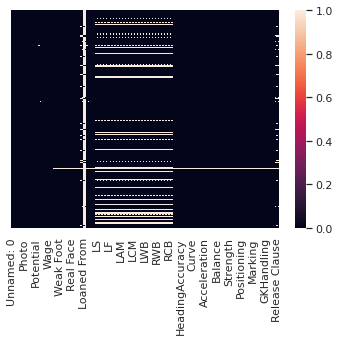

In [148]:
sns.heatmap(data.isnull(),yticklabels = False)

from  heat map we see that 'Loaned from' have more that 90% null value so drop that cloumn.
player ID is already given so 'name', 'photo','flag(flag represent Nationality so we change into numerical value)','club logo(if we already uses club then no use of club logo)' so drop unnecessary feature helps us for better clustering result

In [149]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('Loaned From', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Photo', axis=1, inplace=True)
data.drop('Flag', axis=1, inplace=True)
data.drop('Club Logo', axis=1, inplace=True)

In [150]:
data.head()

ID  Age Nationality  Overall  Potential                 Club    Value  \
0  158023   31   Argentina       94         94         FC Barcelona  €110.5M   
1   20801   33    Portugal       94         94             Juventus     €77M   
2  190871   26      Brazil       92         93  Paris Saint-Germain  €118.5M   
3  193080   27       Spain       91         93    Manchester United     €72M   
4  192985   27     Belgium       91         92      Manchester City    €102M   

    Wage  Special Preferred Foot  ...  Composure  Marking  StandingTackle  \
0  €565K     2202           Left  ...       96.0     33.0            28.0   
1  €405K     2228          Right  ...       95.0     28.0            31.0   
2  €290K     2143          Right  ...       94.0     27.0            24.0   
3  €260K     1471          Right  ...       68.0     15.0            21.0   
4  €355K     2281          Right  ...       88.0     68.0            58.0   

  SlidingTackle GKDiving GKHandling GKKicking  GKPositioning GKReflexes  \
0          26.0      6.0       11.0      15.0           14.0        8.0   
1          23.0      7.0       11.0      15.0           14.0       11.0   
2          33.0      9.0        9.0      15.0           15.0       11.0   
3          13.0     90.0       85.0      87.0           88.0       94.0   
4          51.0     15.0       13.0       5.0           10.0       13.0   

  Release Clause  
0        €226.5M  
1        €127.1M  
2        €228.1M  
3        €138.6M  
4        €196.4M  

[5 rows x 83 columns]

Now changing some data(Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position) drooping this data is not a good idea .so we have to change in categorical data.

In [151]:
catg_list = ['Nationality','Club','Preferred Foot','Work Rate','Body Type','Real Face','Position']
for cat in catg_list:
    data[cat] = data[cat].astype('category')
data[catg_list] = data[catg_list].apply(lambda x: x.cat.codes)
data.head()

ID  Age  Nationality  Overall  Potential  Club    Value   Wage  \
0  158023   31            6       94         94   212  €110.5M  €565K   
1   20801   33          123       94         94   326     €77M  €405K   
2  190871   26           20       92         93   435  €118.5M  €290K   
3  193080   27          139       91         93   375     €72M  €260K   
4  192985   27           13       91         92   374    €102M  €355K   

   Special  Preferred Foot  ...  Composure  Marking  StandingTackle  \
0     2202               0  ...       96.0     33.0            28.0   
1     2228               1  ...       95.0     28.0            31.0   
2     2143               1  ...       94.0     27.0            24.0   
3     1471               1  ...       68.0     15.0            21.0   
4     2281               1  ...       88.0     68.0            58.0   

   SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
0           26.0       6.0        11.0       15.0           14.0        8.0   
1           23.0       7.0        11.0       15.0           14.0       11.0   
2           33.0       9.0         9.0       15.0           15.0       11.0   
3           13.0      90.0        85.0       87.0           88.0       94.0   
4           51.0      15.0        13.0        5.0           10.0       13.0   

  Release Clause  
0        €226.5M  
1        €127.1M  
2        €228.1M  
3        €138.6M  
4        €196.4M  

[5 rows x 83 columns]

From the above plotted hitmap we see that maximum row data are not nan so , we have to replace with missing value to (mean,median,mode). so here we repacing with mode.

In [10]:
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

Now again we see how the data look like after replacing missing value

<AxesSubplot:>

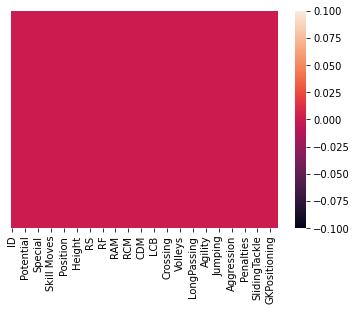

In [11]:
sns.heatmap(data.isnull(),yticklabels = False)

finally all data are nullfree(Not Nan)

Now next task is to conevert partial numerical value into any form ('int16', 'int32', 'int64', 'float16', 'float32', 'float64')  for mathematical calculation

In [12]:
# Convert Value, Wage and Release clause attributes from string to float by replacing M and K 
data['Value'] = data['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data['Wage'] = data['Wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data['Release Clause'] = data['Release Clause'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In the data footbal position are in the form  84+2,92+3... ,now removing '+2,+3..' from data and convert it into numerical form

In [13]:
col_names = data.columns[22:48].values.tolist()
for cols in col_names:
    data[cols] = data[cols].str.split('+').str[0].astype(int)

In [14]:
data.head()

ID  Age  Nationality  Overall  Potential  Club      Value    Wage  \
0  158023   31            6       94         94   212  110500000  565000   
1   20801   33          123       94         94   326   77000000  405000   
2  190871   26           20       92         93   435  118500000  290000   
3  193080   27          139       91         93   375   72000000  260000   
4  192985   27           13       91         92   374  102000000  355000   

   Special  Preferred Foot  ...  Composure  Marking  StandingTackle  \
0     2202               0  ...       96.0     33.0            28.0   
1     2228               1  ...       95.0     28.0            31.0   
2     2143               1  ...       94.0     27.0            24.0   
3     1471               1  ...       68.0     15.0            21.0   
4     2281               1  ...       88.0     68.0            58.0   

   SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
0           26.0       6.0        11.0       15.0           14.0        8.0   
1           23.0       7.0        11.0       15.0           14.0       11.0   
2           33.0       9.0         9.0       15.0           15.0       11.0   
3           13.0      90.0        85.0       87.0           88.0       94.0   
4           51.0      15.0        13.0        5.0           10.0       13.0   

  Release Clause  
0      226500000  
1      127100000  
2      228100000  
3      138600000  
4      196400000  

[5 rows x 83 columns]

Now last task of data cleanig is to select blindly selecting thode cloumn (['int16', 'int32', 'int64', 'float16', 'float32', 'float64']) which is use for numerical calculation and drop Nan value from the data set.

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdata = data.select_dtypes(include=numerics)

In [16]:
newdata = newdata.dropna(axis=0)
newdata

ID  Age  Nationality  Overall  Potential  Club      Value    Wage  \
0      158023   31            6       94         94   212  110500000  565000   
1       20801   33          123       94         94   326   77000000  405000   
2      190871   26           20       92         93   435  118500000  290000   
3      193080   27          139       91         93   375   72000000  260000   
4      192985   27           13       91         92   374  102000000  355000   
...       ...  ...          ...      ...        ...   ...        ...     ...   
18202  238813   19           46       47         65   165      60000    1000   
18203  243165   19          144       47         63   587      60000    1000   
18204  241638   16           46       47         67   122      60000    1000   
18205  246268   17           46       47         66   586      60000    1000   
18206  246269   16           46       46         66   586      60000    1000   

       Special  International Reputation  ...  Composure  Marking  \
0         2202                       5.0  ...       96.0     33.0   
1         2228                       5.0  ...       95.0     28.0   
2         2143                       5.0  ...       94.0     27.0   
3         1471                       4.0  ...       68.0     15.0   
4         2281                       4.0  ...       88.0     68.0   
...        ...                       ...  ...        ...      ...   
18202     1307                       1.0  ...       45.0     40.0   
18203     1098                       1.0  ...       42.0     22.0   
18204     1189                       1.0  ...       41.0     32.0   
18205     1228                       1.0  ...       46.0     20.0   
18206     1321                       1.0  ...       43.0     40.0   

       StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0                28.0           26.0       6.0        11.0       15.0   
1                31.0           23.0       7.0        11.0       15.0   
2                24.0           33.0       9.0         9.0       15.0   
3                21.0           13.0      90.0        85.0       87.0   
4                58.0           51.0      15.0        13.0        5.0   
...               ...            ...       ...         ...        ...   
18202            48.0           47.0      10.0        13.0        7.0   
18203            15.0           19.0      10.0         9.0        9.0   
18204            13.0           11.0       6.0         5.0       10.0   
18205            25.0           27.0      14.0         6.0       14.0   
18206            43.0           50.0      10.0        15.0        9.0   

       GKPositioning  GKReflexes  Release Clause  
0               14.0         8.0       226500000  
1               14.0        11.0       127100000  
2               15.0        11.0       228100000  
3               88.0        94.0       138600000  
4               10.0        13.0       196400000  
...              ...         ...             ...  
18202            8.0         9.0          143000  
18203            5.0        12.0          113000  
18204            6.0        13.0          165000  
18205            8.0         9.0          143000  
18206           12.0         9.0          165000  

[18207 rows x 74 columns]

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(newdata)
X.shape

(18207, 74)

# 1.Data visualisation

## Distribution plots

We can use these plots to understand the mean, median, range, variance, deviation

[Text(0, 0, 'Left'), Text(1, 0, 'Right')]

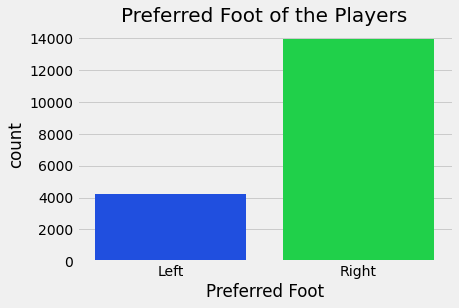

In [84]:
graph = sns.countplot(x=data['Preferred Foot'], data=data)
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels())

from above graph we concude that approxmatly for playing game  23 % time used left foot and 77% times uses right foot.  

<AxesSubplot:xlabel='Height', ylabel='count'>

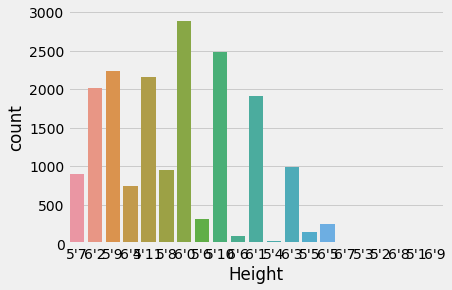

In [85]:
plt.style.use('seaborn-bright')
sns.countplot(x=data['Height'], data=data)

This plot shown us to frequency of player which height ,form the plot clearly shows that frquency of 6 feet tall player maximum count.

<AxesSubplot:xlabel='Potential', ylabel='count'>

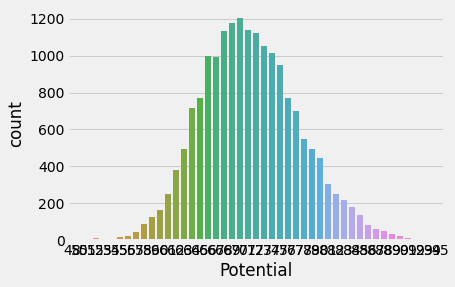

In [87]:
sns.countplot(x=data['Potential'], data=data)

<AxesSubplot:xlabel='LongPassing'>

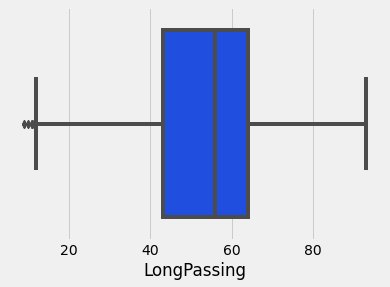

In [138]:
sns.boxplot(x='LongPassing', data= data)

Boxplot are  use to see the mejority of data i.e lonpassing length is 90 % in betwwen 45-75 .And it is also to visualise the outlier int the dataset for better clustering result. 

<AxesSubplot:xlabel='Potential'>

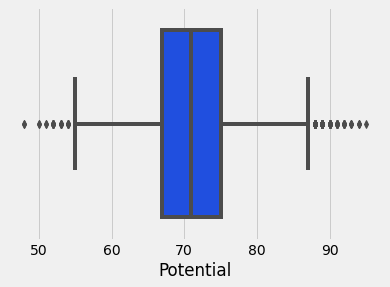

In [137]:
sns.boxplot(x='Potential', data= data)

On behaff of potential we se slightly greater outlier as cpmapre to the lonpassing.

<AxesSubplot:xlabel='Position', ylabel='count'>

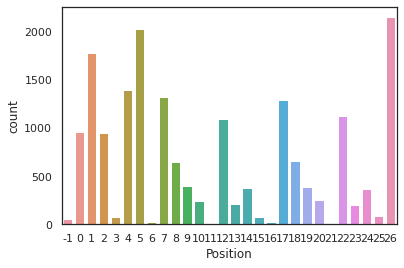

In [152]:
sns.countplot(x='Position', data= data)

In [141]:
#position names are
data.columns[24:48]

Index(['RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

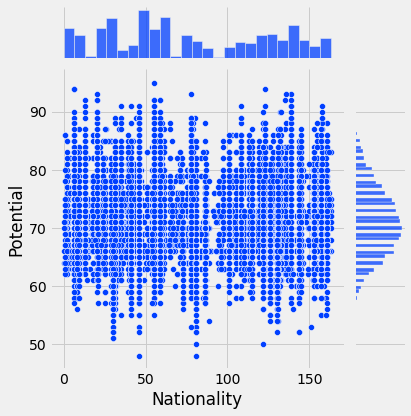

In [139]:
sns.jointplot(x = data['Nationality'], y = data['Potential'], kind = 'scatter')

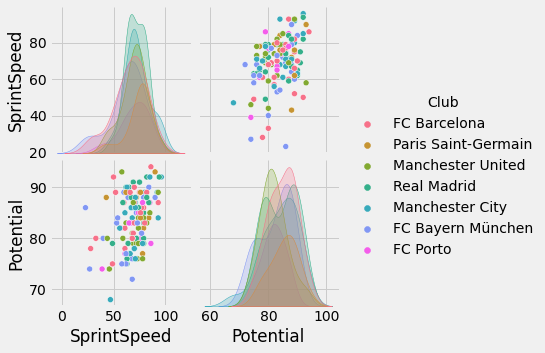

In [93]:
# Creating a dataframe consisting of players from certain teams and nationalities. 
f_data = data[(data['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Real Madrid','FC Porto','FC Bayern München'])) & 
                      (data['Nationality'].isin(['England', 'Brazil', 'Argentina',
       'Brazil', 'Italy','Spain','Germany'])) 
                     ]
g = sns.pairplot(f_data[['Value','SprintSpeed','Potential','Wage','Club']],hue = 'Club')

In [126]:
norm_data = pd.DataFrame(X)
norm_data

0         1         2         3         4         5         6   \
0      0.640732  0.517241  0.036810  1.000000  0.978723  0.327189  0.932489   
1      0.084285  0.586207  0.754601  1.000000  0.978723  0.502304  0.649789   
2      0.773933  0.344828  0.122699  0.958333  0.957447  0.669739  1.000000   
3      0.782891  0.379310  0.852761  0.937500  0.957447  0.577573  0.607595   
4      0.782506  0.379310  0.079755  0.937500  0.936170  0.576037  0.860759   
...         ...       ...       ...       ...       ...       ...       ...   
18202  0.968342  0.103448  0.282209  0.020833  0.361702  0.254992  0.000506   
18203  0.985990  0.103448  0.883436  0.020833  0.319149  0.903226  0.000506   
18204  0.979798  0.000000  0.282209  0.020833  0.404255  0.188940  0.000506   
18205  0.998573  0.034483  0.282209  0.020833  0.382979  0.901690  0.000506   
18206  0.998577  0.000000  0.282209  0.000000  0.382979  0.901690  0.000506   

             7         8     9   ...        64        65        66        67  \
0      1.000000  0.910836  1.00  ...  1.000000  0.329670  0.285714  0.261364   
1      0.716814  0.926935  1.00  ...  0.989247  0.274725  0.318681  0.227273   
2      0.513274  0.874303  1.00  ...  0.978495  0.263736  0.241758  0.340909   
3      0.460177  0.458204  0.75  ...  0.698925  0.131868  0.208791  0.113636   
4      0.628319  0.959752  0.75  ...  0.913978  0.714286  0.615385  0.545455   
...         ...       ...   ...  ...       ...       ...       ...       ...   
18202  0.001770  0.356656  0.00  ...  0.451613  0.406593  0.505495  0.500000   
18203  0.001770  0.227245  0.00  ...  0.419355  0.208791  0.142857  0.181818   
18204  0.001770  0.283591  0.00  ...  0.408602  0.318681  0.120879  0.090909   
18205  0.001770  0.307740  0.00  ...  0.462366  0.186813  0.252747  0.272727   
18206  0.001770  0.365325  0.00  ...  0.430108  0.406593  0.450549  0.534091   

             68        69        70        71        72        73  
0      0.056180  0.109890  0.155556  0.146067  0.075269  0.992985  
1      0.067416  0.109890  0.155556  0.146067  0.107527  0.557187  
2      0.089888  0.087912  0.155556  0.157303  0.107527  1.000000  
3      1.000000  0.923077  0.955556  0.977528  1.000000  0.607606  
4      0.157303  0.131868  0.044444  0.101124  0.129032  0.861018  
...         ...       ...       ...       ...       ...       ...  
18202  0.101124  0.131868  0.066667  0.078652  0.086022  0.000570  
18203  0.101124  0.087912  0.088889  0.044944  0.118280  0.000438  
18204  0.056180  0.043956  0.100000  0.056180  0.129032  0.000666  
18205  0.146067  0.054945  0.144444  0.078652  0.086022  0.000570  
18206  0.101124  0.153846  0.088889  0.123596  0.086022  0.000666  

[18207 rows x 74 columns]

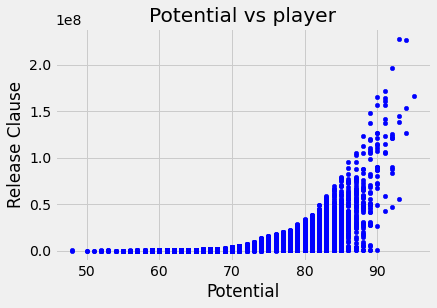

In [134]:
data.plot(kind = 'scatter',x='Potential', y='Release Clause', alpha=1, color='blue')
plt.xlabel('Potential')
plt.ylabel('Release Clause')
plt.title('Potential vs player')
plt.show()

form the plot clearly see that two dots that are maybe (ronaldo ans messi) .according to the potential of the player

# ***

# 2.K-means 


### steps
#### 1. initialise k cluster center using forgy method or random partition
    in this algrothim we used center initialisation forgy method.
forgy method  : In this method  randomally  initialise cluster center corresponding to each cluster.

#### 2. Calculate distance(Euclidean or manhatten ) each data point in data from cluster centre.

#### 3. Append data point which have minimum distance from cluster to that cluster.

#### 5. Calculate cluster centre using avg mean .

#### 6. Repeat steps 2,3,4 untill cluster centre does'nt  change.
    here we use fixed iteration for clustering data point. 

# *

### we can use distance metric as euclidean or manhatten .

*Euclidean distance*
$ d\left( C,Q\right)$   = $ \sqrt { \sum _{i=1}^{n} \left( c_{i}-q_{i}\right)^2 }$  

*Manhatten distnace*
$ d\left( C,Q\right)$   = $ \sum _{i=1}^{n} \mid {\left( c_{i}-q_{i}\right)}\mid $ 

In [145]:
def euclidean(centroids,dataPoint):
    dist_list = []
    for i in centroids:
        dst = np.linalg.norm(i-dataPoint)
        dist_list.append(dst)
    return dist_list
 
def manhatten(centroids,dataPoint):
    dist_list = []
    for i in centroids:
        dst = np.sum(abs(i-dataPoint))
        dist_list.append(dst)
    return dist_list

## K-means algorithm.

In [205]:
def kmeans(k,itr,X,metric):
    centroids = []
    X_len = len(X)
    
    ##initialise cluster centre.
    for i in range(0,k):
        a = np.random.randint(0,X_len-1)
        centroids.append(X[a])
    final_cluster = None
    for it in range(0,itr):
        #stroing all cluster in list
        clusters = {}
        #creating empty list for k cluster
        for cls in range(k):
            clusters[cls]=[]
            
        for x in X:
            dist_ = None
            if metric == "euc":
                dist_ = euclidean(centroids,x)
            if metric == "man":
                dist_ = manhatten(centroids,x)
            ## assign datapoint to that cluster which give minimum error.
            minpos = dist_.index(min(dist_))
            clusters[minpos].append(x)
            
        # calculating cluster centre of newly fromed cluster.
        for i in range(k):
            centroids[i]= np.mean(clusters[i],axis=0)
        final_cluster = clusters
    return np.array(centroids),final_cluster

Here we prdict the dataset ans return a list that shows the cluster index(number ) which belong to the nearest cluster.

In [189]:
def predict(centroids,data) :
    preds = []
    for x in data :
        dist = [np.linalg.norm(x-centroid) for centroid in centroids]
        cluster_no = dist.index(min(dist))
        preds.append(cluster_no)
    return np.array(preds)

<AxesSubplot:>

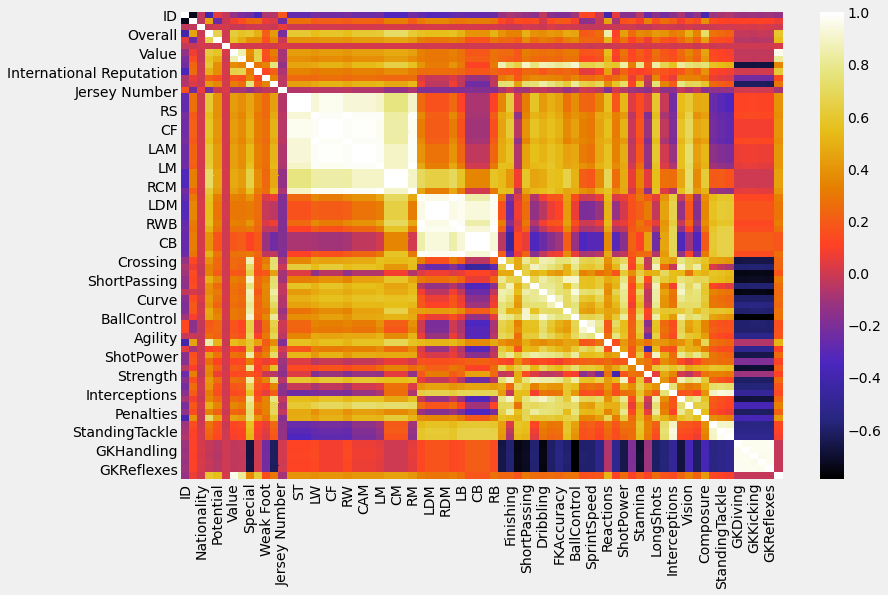

In [161]:
cor = newdata.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(cor,cmap=plt.cm.CMRmap)

#### from hitmap we see that maximum feature are repeated so compress/reduce feature in 2d .means Using PCA convert multidimensional feature in 2d feature matrix...  and pca is also useful in case of visualising cluster int 2d or 3d dimensional

In [162]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(newdata)
X_.shape

(18207, 74)

For ploting the maultidimentioanal data in 2d plan , so we have to reduce the dimensionality of data using principle component analysis 

In [163]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_)

In [164]:
df_pca = pd.DataFrame(data = x_pca, columns = ['feat1', 'feat2'] )
df_pca.head()

feat1     feat2
0  2.400954 -0.989905
1  2.345899 -0.747423
2  2.235634 -0.923439
3 -1.385240  0.153597
4  2.450153  0.202621

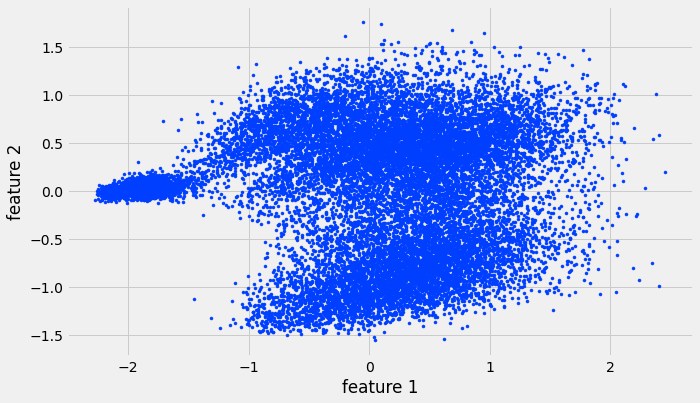

In [220]:
plt.figure(figsize=(10,6))
# plt.style.use('seaborn-bright')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(df_pca['feat1'], df_pca['feat2'],marker='.')

In [224]:
def plot_cluster(centroids,clusters):
    colors = ["green","red","aqua","blue","yellow","magenta","pink"]
    for cls in clusters:
        cluster_ = np.array(clusters[cls])
        sns.scatterplot(x=cluster_[:,0], y=cluster_[:,1], marker =".",color=colors[cls])
    plt.scatter(centroids[:,0],centroids[:,1],color='k')
    plt.title('Clusters of footballers')
    plt.xlabel("feature 1") 
    plt.ylabel("feature 2")      
    plt.show()    

## Observation based on Euclidean distance

### when number of cluster is 3

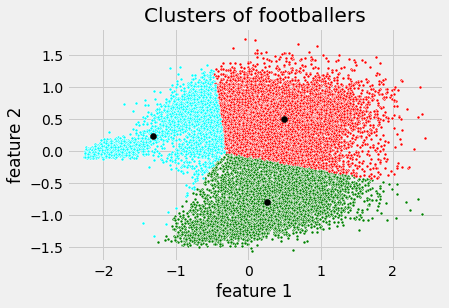

In [225]:
centroids,clusters = kmeans(3,10,x_pca,"euc")
plot_cluster(centroids,clusters)

### when number of cluster is 5

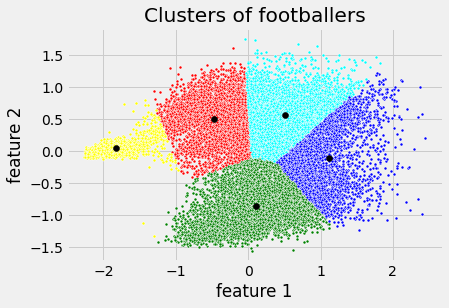

In [226]:
centroids,clusters = kmeans(5,10,x_pca,"euc")
plot_cluster(centroids,clusters)

### when number of cluster is 7

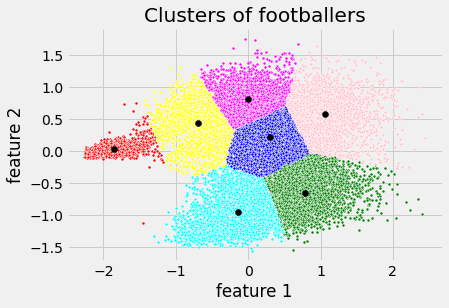

In [227]:
centroids,clusters = kmeans(7,10,x_pca,"euc")
plot_cluster(centroids,clusters)

## Observation based on Manhatten distance

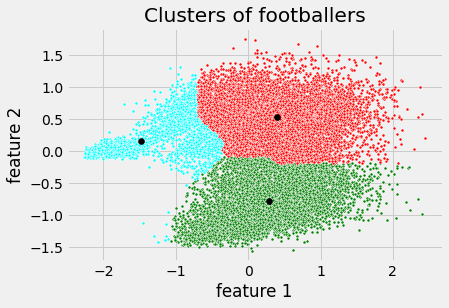

In [228]:
centroids,clusters = kmeans(3,10,x_pca,"man")
plot_cluster(centroids,clusters)

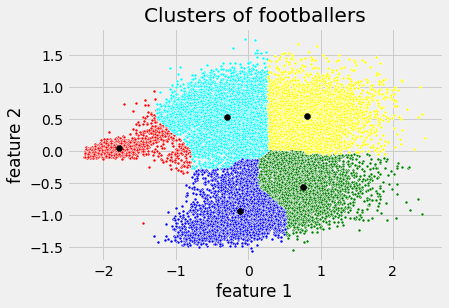

In [229]:
centroids,clusters = kmeans(5,10,x_pca,"man")
plot_cluster(centroids,clusters)

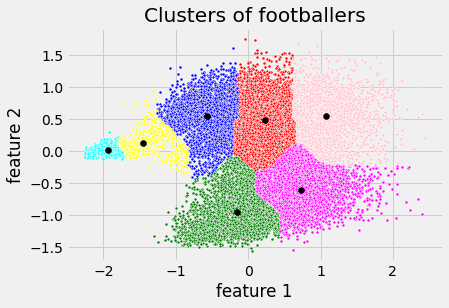

In [230]:
centroids,clusters = kmeans(7,10,x_pca,"man")
plot_cluster(centroids,clusters)

for getting better clustering result we have to use elbow and silhoutte method which are used to decrease the intracluster distance and increase the intercluster distance(may or may not be true).
But intracluster distance is minium to give good clustering result . for that purpose we use elbow and silhoutte method

### for selecting optimal number of cluster k we use method i.e.
##### elbow method
##### Silhouette method

####  Elbow method are used to detremine optimal value of K(number of cluster) on the basis of Distortion and Inertia

within cluster sum of squared distances

In [248]:
#elbow from scratch
def elbow(X):
    inertia_list = {}
    for k in range(1,11):
        centroids,clusters = kmeans(k,10,X,"euc")
        inertia = 0
        for j in range(0,len(clusters)):
            inertia+=np.sum((np.array(clusters[j])-np.array(centroids[j]))**2)
#         print("k = ",k," ",inertia)
        inertia_list[k]=inertia
    return inertia_list

In [237]:
inertia_list = elbow(X)

k =  1   40524.717915826004
k =  2   30490.85339120405
k =  3   24621.075451070334
k =  4   17547.176833977297
k =  5   15849.375062113002
k =  6   14516.430395850086
k =  7   14295.06734710907
k =  8   13517.933418015466
k =  9   13262.473511861172
k =  10   12892.315044026236


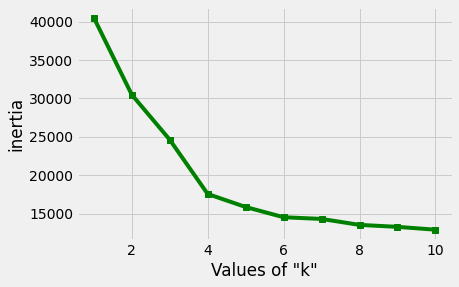

In [238]:
plt.plot(inertia_list.keys(), inertia_list.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('inertia')
plt.show()

form the above plotted graph the we see that inertia is minimum in case of 4 . but if increase the number of cluster yhe inertia is already low but that are not useful in many case so we consider that point most covergence point are considerd as the optimal number of cluster

#### Silhouette method are used to detremine optimal value of K(number of cluster) on the basis of Distortion and Inertia

In [249]:
def silhouette(X):
    silhouette_scores = {} 
    for i in range(2,11):
        model = KMeans(n_clusters=i)
        model.fit(X)
        pred = model.predict(X)
        score = silhouette_score(X, pred)
#         print("k = ",i," ",score)
        silhouette_scores[i]=score
    return silhouette_scores

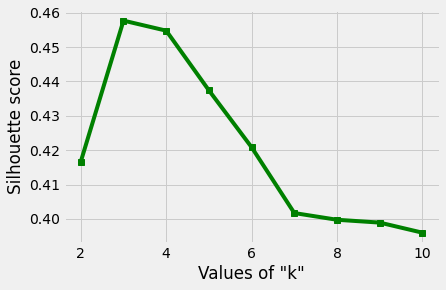

In [251]:
silhouette_scores = silhouette(X)
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('Silhouette score')
plt.show()

form the above graph we see that silhoutte score approximatly equal.

Optimal Number of cluster is defined by best silhoutte score.

using silhoutte score not varry too much 

using elbow method we get optimal cluser is k=3


Note: considering both method finally we can say that optimal number of cluster is k=3.

here we see that elbow graph using scratch and using sklearn approxmatly same . it varry due to cluster centre initialisation.

from scratch we using random cluster init. but In case sklearn in that cluster centre are initialised using Kmean++. 

In both method of elbow we get same result as k=4.

In [253]:
centroids,clusters = kmeans(4,10,x_pca,"euc")
y_pred = predict(centroids,x_pca)

In [255]:
df = pd.read_csv("football_data.csv",header=0)
names = list(df['Name'])

In [257]:
x_p = pd.DataFrame(x_pca)
x_p['name'] = names
x_p['cluster'] = y_pred
x_p

0         1                name  cluster
0      2.400954 -0.989905            L. Messi        1
1      2.345899 -0.747423   Cristiano Ronaldo        1
2      2.235634 -0.923439           Neymar Jr        1
3     -1.385240  0.153597              De Gea        0
4      2.450153  0.202621        K. De Bruyne        1
...         ...       ...                 ...      ...
18202 -0.928911 -0.315748        J. Lundstram        0
18203 -1.453043 -1.123006  N. Christoffersson        0
18204 -1.129487 -1.334097           B. Worman        3
18205 -1.025443 -1.210738      D. Walker-Rice        3
18206 -0.889735 -0.231033           G. Nugent        0

[18207 rows x 4 columns]

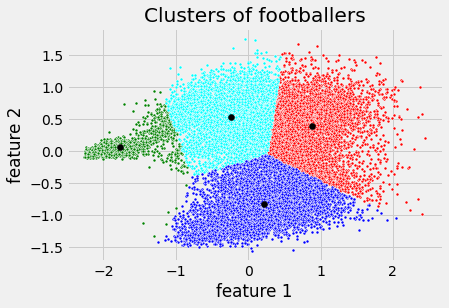

In [258]:
plot_cluster(centroids,clusters)

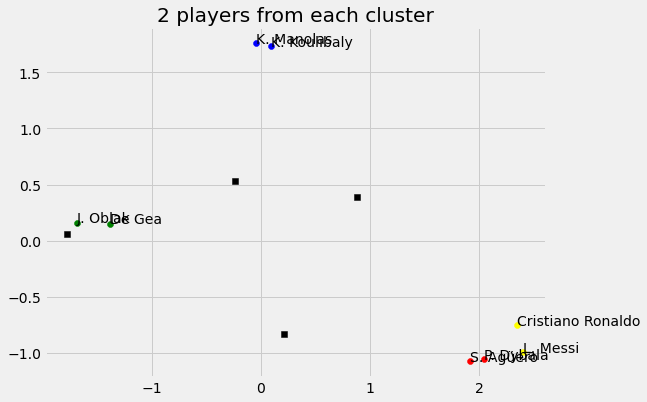

In [273]:
colors = ["green","yellow","blue","red"]
plt.figure(figsize=(8,6))
for i in range(4) :
    df = x_p[x_p['cluster']==i]
    for j in range(2) :
        plt.scatter(df.iloc[[j]][0], df.iloc[[j]][1] , marker = 'o', color= colors[i])
        plt.text(df.iloc[[j]][0], df.iloc[[j]][1], s = df.iloc[[j]].iloc[0]['name'])
plt.scatter(centroids[:,0],centroids[:,1],marker='s',color='black')
plt.title('2 players from each cluster')
plt.show()

plotted the result that are most sparse point are outlier that are in diffrent cluster.


from the above anlysis on euclidean and manhatten . we se better performance int case of sparse data , elbow and
silhoutte method showing approximatly same result i.e optimal number of cluster 4 .

For clustering performance checkup we use silhoutte score .

# ***

# 3. Hierarchical Clustering

In [18]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(newdata)
scaled_df = scaler.fit_transform(newdata) 
# norm_df = normalize(scaled_df) 

# norm_df = pd.DataFrame(norm_df) 

## converting multidimensional into 2d
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(scaled_df) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['feat1', 'feat2']

In [19]:
X_pca.head(5)

feat1     feat2
0  2.400954 -0.989905
1  2.345899 -0.747423
2  2.235634 -0.923439
3 -1.385240  0.153597
4  2.450153  0.202621

## A. Agglomerative Clustering(Bottom-up)

Now we have to determine the number of optimal cluster using Agglomerative clustering with help silhoutte score


The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

’ward’ minimizes the variance of the clusters being merged.

so our clustering based on default linkage i.e "ward"

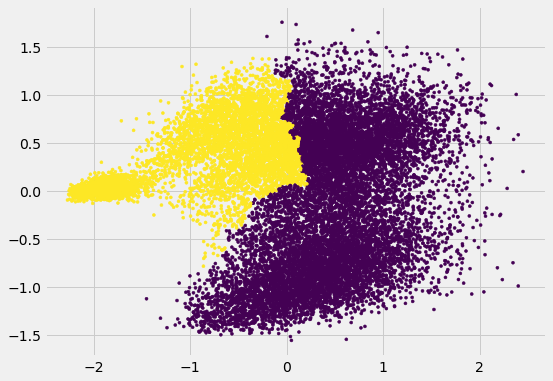

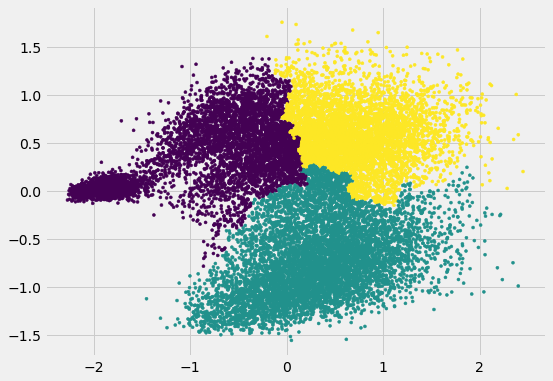

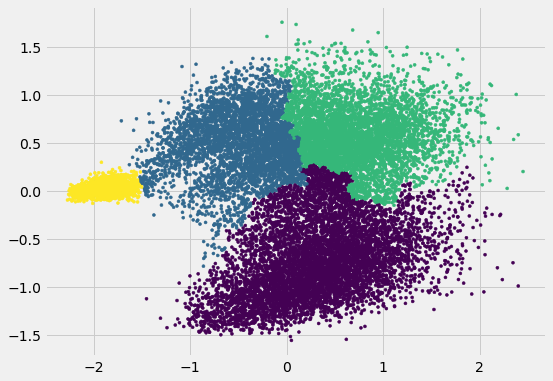

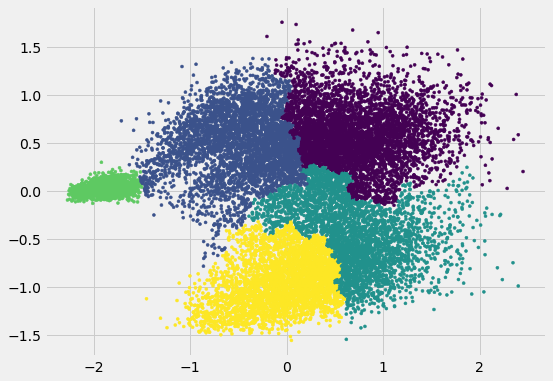

In [298]:
K = [2,3,4,5]
for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    pred = model.fit_predict(x_pca)
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca['feat1'], X_pca['feat2'], c=pred, marker='.') 
    plt.show() 

In [20]:
silhouette_scores = {} 
for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters = k)
    pred = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, pred)
    print("k = ",k," ",score)
    silhouette_scores[k]=score

k =  2   0.37362907393102496
k =  3   0.39483552217861456
k =  4   0.4303782971975343
k =  5   0.40242022505472663
k =  6   0.34865090350862005
k =  7   0.356235918303234


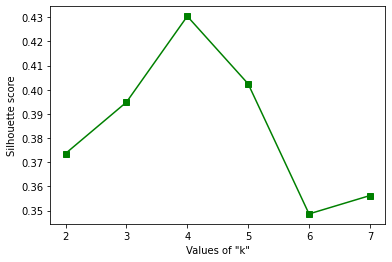

In [22]:
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('Silhouette score')
plt.show()

From the bar_graph we see that optimal number of cluster k=4 , so we take as k=4 and visualise cluster 

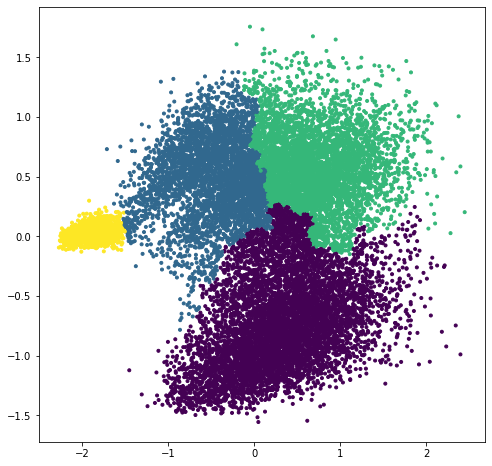

In [23]:
model_ag = AgglomerativeClustering(n_clusters=4)
pred_ag4 = model_ag.fit_predict(X_pca)
plt.figure(figsize=(8,8))
plt.scatter(X_pca['feat1'], X_pca['feat2'], c=pred_ag4,marker='.') 
plt.show() 

### Dendogram for AgglomerativeClustering

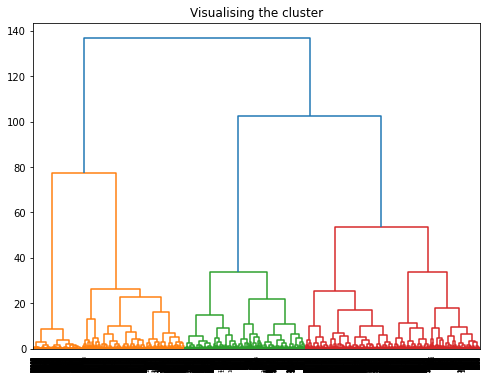

In [24]:
plt.figure(figsize =(8, 6)) 
plt.title('Visualising the cluster') 
dist_linkage = hierarchy.linkage(X_pca, method ='ward')
Dendrogram = hierarchy.dendrogram(dist_linkage) 

In [25]:
dist_linkage = hierarchy.linkage(X_pca, method ='complete')

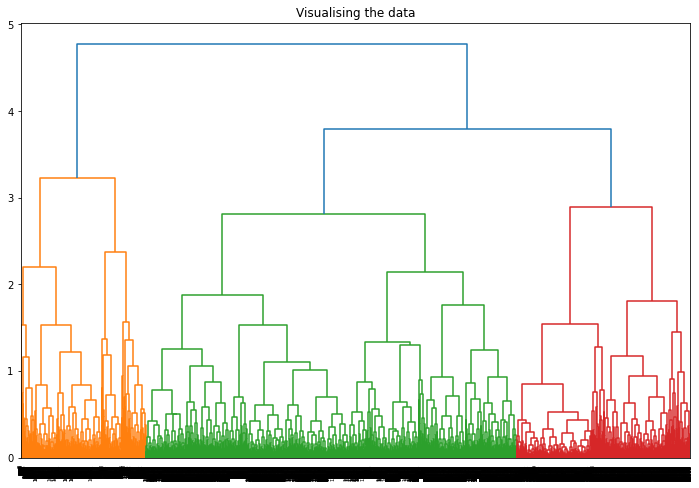

In [26]:
plt.figure(figsize =(12, 8)) 
plt.title('Visualising the data') 
Dendrogram = hierarchy.dendrogram(dist_linkage) 

In [27]:
dist_linkage = hierarchy.linkage(X_pca, method ='average')

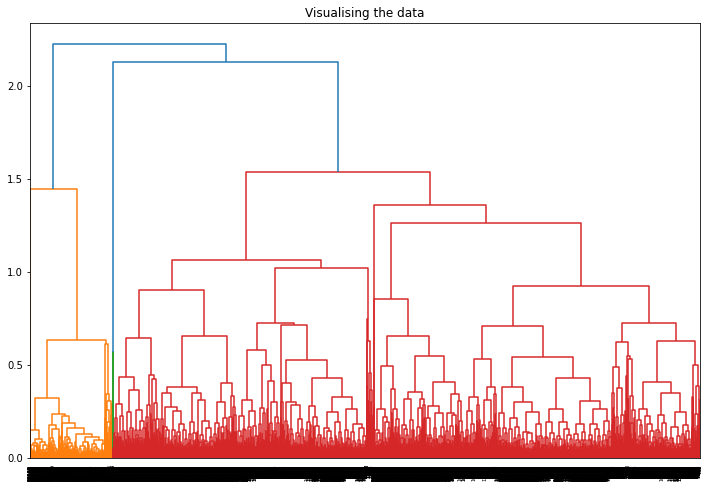

In [28]:
plt.figure(figsize =(12,8)) 
plt.title('Visualising the data') 
Dendrogram = hierarchy.dendrogram(dist_linkage) 

## B. Divisive Clustering(Top down)

In [47]:
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(newdata) 

df = pd.DataFrame(scaled_df) 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(df) 
reducedX = pd.DataFrame(X_pca)
reducedX.shape

(18207, 2)

In [49]:
k = 4
model = KMeans(n_clusters=k)
model.fit(reducedX)
clusters = model.labels_.tolist()

In [51]:
df = pd.read_csv('football_data.csv',header=0)

In [54]:
names = df['Name']
Pos = df['Position']

In [138]:
reducedX['cluster'] = clusters
reducedX['name'] = names
reducedX['position'] = Pos
reducedX.columns = ['x', 'y', 'cluster', 'name', 'position']

In [137]:
reducedX.head(5)

x         y  cluster               name position
0  2.400954 -0.989905        0           L. Messi       RF
1  2.345899 -0.747423        0  Cristiano Ronaldo       ST
2  2.235634 -0.923439        0          Neymar Jr       LW
3 -1.385240  0.153597        3             De Gea       GK
4  2.450153  0.202621        0       K. De Bruyne      RCM

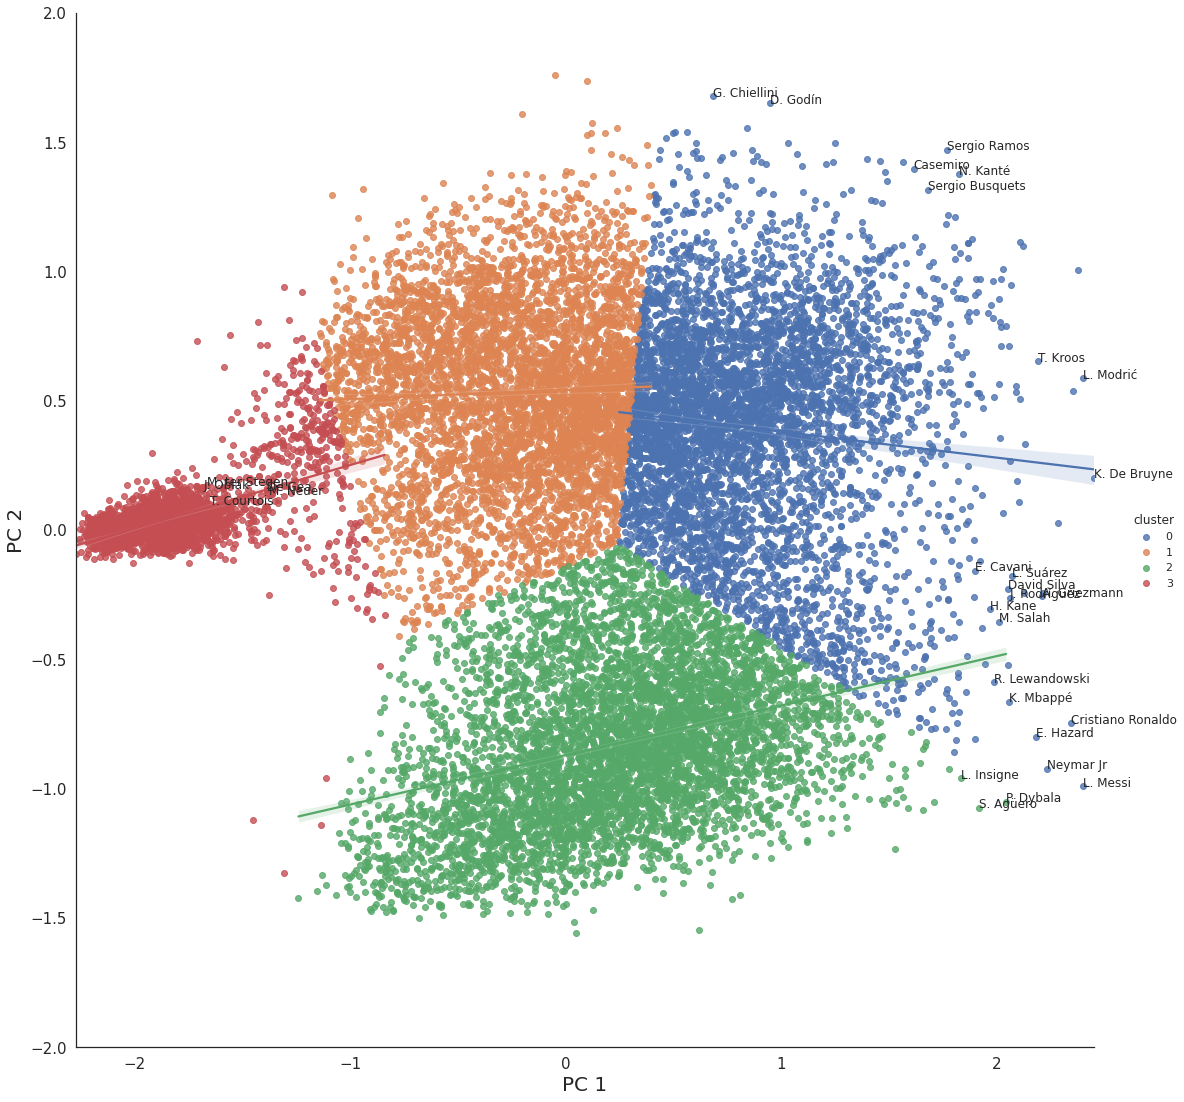

In [64]:
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reducedX,height = 15)
tempx = reducedX[0:30]
texts = []
for x, y, s in zip(tempx.x, tempx.y,tempx.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [66]:
data = [{} for _ in range(0,5)]
for index, row in reducedX.iterrows():
    cl_no = row['cluster']
    pos = row['position']
    if pos in data[cl_no]:
        data[cl_no][pos] += 1
    else:
        data[cl_no][pos] = 1
table = pd.DataFrame(data)
table = table.fillna(0)
table

RF      ST     LW    RCM    LF     RS    RCB    LCM      CB    LDM  ...  \
0  7.0   102.0   60.0  302.0   5.0   23.0  101.0  290.0   151.0  178.0  ...   
1  0.0    11.0    2.0   52.0   0.0    0.0  534.0   52.0  1345.0   59.0  ...   
2  9.0  2035.0  319.0   37.0  10.0  180.0    1.0   53.0     2.0    6.0  ...   
3  0.0     4.0    0.0    0.0   0.0    0.0   26.0    0.0   280.0    0.0  ...   
4  0.0     0.0    0.0    0.0   0.0    0.0    0.0    0.0     0.0    0.0  ...   

     RDM     RW     CM     RB   RAM    CF   RWB   LWB   NaN      GK  
0  184.0   54.0  733.0  610.0   6.0   8.0  41.0  39.0  48.0     0.0  
1   54.0    1.0  392.0  655.0   0.0   0.0  40.0  35.0   6.0     0.0  
2   10.0  315.0  262.0    4.0  15.0  66.0   2.0   2.0   5.0     0.0  
3    0.0    0.0    7.0   22.0   0.0   0.0   4.0   2.0   1.0  2025.0  
4    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0     0.0  

[5 rows x 28 columns]

# ***

# 4. DBSCAN

In [111]:
from sklearn.cluster import DBSCAN
import matplotlib.colors
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(newdata) 

df = pd.DataFrame(scaled_df) 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(df) 
X_pca1 = pd.DataFrame(X_pca) 
X_pca1.head(5)

0         1
0  2.400954 -0.989905
1  2.345899 -0.747423
2  2.235634 -0.923439
3 -1.385240  0.153597
4  2.450153  0.202621

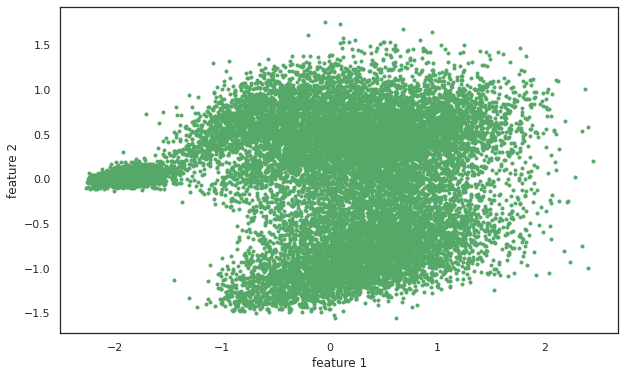

In [97]:
plt.figure(figsize=(10,6))
# plt.style.use('seaborn-bright')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(X_pca1['feat1'], X_pca1['feat2'],marker='.',c='g')

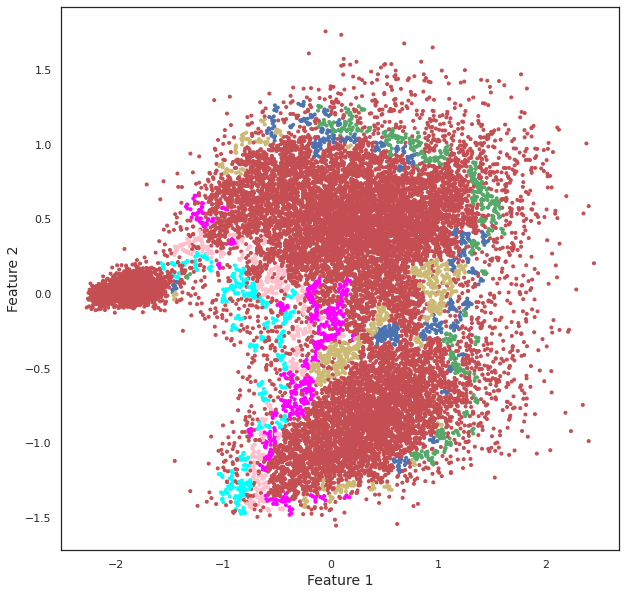

In [135]:
dbscan = DBSCAN(eps = 0.03, min_samples = 4).fit(X_pca1)
colors =['r','g','b','y','magenta','pink','aqua']
X_pca1['DBSCAN_labels']=dbscan.labels_ # Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(X_pca1[0],X_pca1[1],c=X_pca1['DBSCAN_labels'],marker='.',cmap=matplotlib.colors.ListedColormap(colors),)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

DBSAN paremeters:
    
Minimum samples (“MinPts”): the fewest number of points required to form a cluster
    
ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging 
to the same cluster also says that neighbourhood radius.

#### default value eps =0.5 ans min_samples=5,

for selecting best parameter value for minpts ans epsilon we divided task in 2 phase.

In first phase we selecting best value for minpts with the help of silhoutte score. If silhoutte score is 

maximum on which parameter is best parameter.

In second phase we use previous result(minpts) for slecting best epsilon . in this case if silhoutte score is 

maximum on which epsilon consider that epsilon as a best parameter value.   

In [19]:
X_pca1.shape

(18207, 2)

Find an Optimal Epsilon

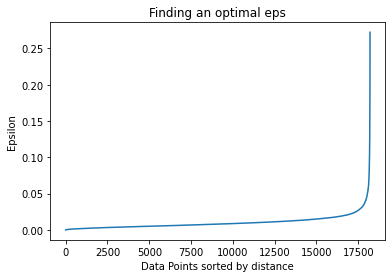

In [125]:
from sklearn.neighbors import NearestNeighbors

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)
# fit the nearest neighbor
nbrs = nn.fit(X_pca)
# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(X_pca)
# sort the distance and plot it
distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.title('Finding an optimal eps')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.plot(distances)

from the above graph curvature start up in range of approximetly 0.3-0.4

so optimal value of eps is o.35

In [133]:
import random
epslist = []
for i in range(0,200):
    n = random.random()
    epslist.append(n)

In [35]:
max_ = (0,0)
for i in epslist:
    model = DBSCAN(eps = i, min_samples = 4)
    model.fit(X_pca)
    label = model.labels_
    if len(set(label))>=2:
        score = silhouette_score(X_pca1,label)
        print("for eps value +"+str(i),"silhoutte score is ",score)
        if max_[0]<score:
            max_ = (score,i)

for eps value +0.2296637984256913 silhoutte score is  0.38031993420448884
for eps value +0.2495803004822521 silhoutte score is  0.410990561589575
for eps value +0.06470693279407846 silhoutte score is  -0.22716415668297146
for eps value +0.22308334161927723 silhoutte score is  0.38031993420448884
for eps value +0.1905881493222058 silhoutte score is  0.38686217254330846
for eps value +0.14700372564124053 silhoutte score is  0.3702009270640189
for eps value +0.14090925226227025 silhoutte score is  0.366329720656104
for eps value +0.22375936937595675 silhoutte score is  0.38031993420448884
for eps value +0.24433627121007828 silhoutte score is  0.41258746244040523
for eps value +0.07909361212415023 silhoutte score is  0.026810571770783154
for eps value +0.21548612755270313 silhoutte score is  0.388261162336577
for eps value +0.08973354462384997 silhoutte score is  0.1732088323417259
for eps value +0.06274108434783598 silhoutte score is  -0.3633322515321194
for eps value +0.20517475639828042

In [36]:
max_[0],max_[1]

(0.4236521694649974, 0.25284649533296233)

from the above observation ,maximum silhoutte score is 0.42 and for this silhoutte score eps value=0.25284 , so this value are use for finding best values of minPts(min_samples)

In [38]:
rng_mnpts = []
for i in range(0,200):
    n = random.randint(0,50)
    rng_mnpts.append(n)

In [39]:
max_ = (0,0)
for i in rng_mnpts:
    model = DBSCAN(eps = 0.2584, min_samples = i)
    model.fit(X_pca)
    label = model.labels_
    if len(set(label))>=2:
        score = silhouette_score(X_pca1,label)
        print("for eps value +"+str(i),"silhoutte score is ",score)
        if max_[0]<score:
            max_ = (score,i)

for eps value +17 silhoutte score is  0.4046002453869846
for eps value +10 silhoutte score is  0.416060943206898
for eps value +26 silhoutte score is  0.3921256908853478
for eps value +37 silhoutte score is  0.38493582233913076
for eps value +42 silhoutte score is  0.36947806943410294
for eps value +39 silhoutte score is  0.3777988237961726
for eps value +18 silhoutte score is  0.40686186249509637
for eps value +9 silhoutte score is  0.416060943206898
for eps value +45 silhoutte score is  0.36947806943410294
for eps value +36 silhoutte score is  0.38493582233913076
for eps value +19 silhoutte score is  0.40686186249509637
for eps value +1 silhoutte score is  0.4236521694649974
for eps value +36 silhoutte score is  0.38493582233913076
for eps value +44 silhoutte score is  0.36947806943410294
for eps value +45 silhoutte score is  0.36947806943410294
for eps value +44 silhoutte score is  0.36947806943410294
for eps value +35 silhoutte score is  0.38493582233913076
for eps value +22 silhou

for eps value +23 silhoutte score is  0.39853306627388124
for eps value +2 silhoutte score is  0.4236521694649974
for eps value +37 silhoutte score is  0.38493582233913076
for eps value +20 silhoutte score is  0.3987720573394609
for eps value +0 silhoutte score is  0.4236521694649974
for eps value +25 silhoutte score is  0.39757765946192836
for eps value +35 silhoutte score is  0.38493582233913076
for eps value +29 silhoutte score is  0.3921256908853478
for eps value +10 silhoutte score is  0.416060943206898
for eps value +22 silhoutte score is  0.39853306627388124
for eps value +31 silhoutte score is  0.38552309169980553
for eps value +24 silhoutte score is  0.39757765946192836
for eps value +50 silhoutte score is  0.3611001984818685
for eps value +10 silhoutte score is  0.416060943206898
for eps value +2 silhoutte score is  0.4236521694649974
for eps value +7 silhoutte score is  0.4148596455297945
for eps value +32 silhoutte score is  0.38552309169980553
for eps value +29 silhoutte s

On Observation of serveral value of eps and several value of min points ,we get best silhoutte score for mn_samples = 4.

so our optimal value is eps = 0.03 ans mn_samples= 4 ,now uses this result for visualise the cluster

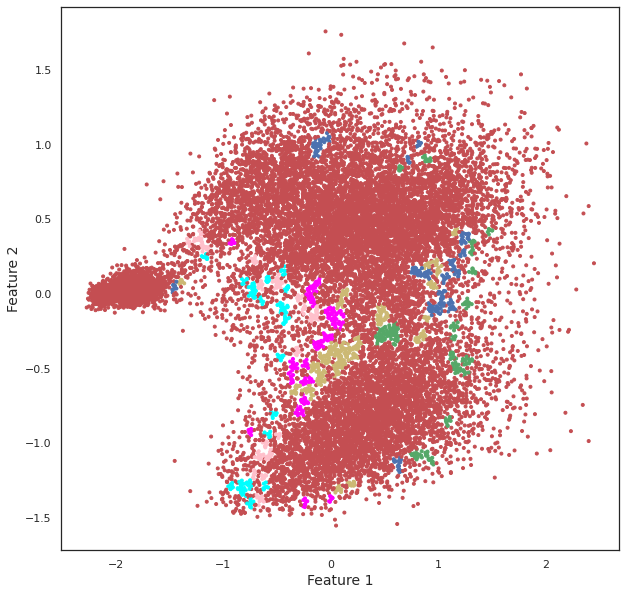

In [136]:
dbscan = DBSCAN(eps = 0.03, min_samples = 7).fit(X_pca1)
colors =['r','g','b','y','magenta','pink','aqua']
X_pca1['DBSCAN_labels']=dbscan.labels_ # Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(X_pca1[0],X_pca1[1],c=X_pca1['DBSCAN_labels'],marker='.',cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [131]:
db = DBSCAN(eps =0.2584 , min_samples = 4)
db_clusters = db.fit_predict(X_pca1)
X_pca1['cluster'] = db_clusters
X_pca1.head()

0         1  DBSCAN_labels  cluster
0  2.400954 -0.989905             -1        0
1  2.345899 -0.747423             -1        0
2  2.235634 -0.923439             -1        0
3 -1.385240  0.153597              0        1
4  2.450153  0.202621             -1        0

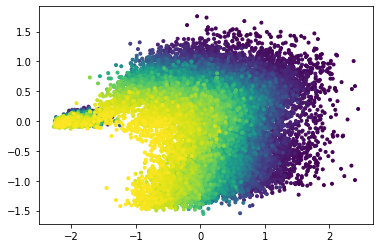

In [113]:
plt.scatter(X_pca1['feat1'], X_pca1['feat2'], c=db_clusters, marker='.') 
plt.show() 

In [ ]:
X_pca1['cluster'] = clusters
X_pca1['name'] = names
X_pca1['position'] = Pos
X_pca.columns = ['x', 'y', 'cluster', 'name', 'position']

In [140]:
X_pca1.head(5)

x         y  cluster               name position
0  2.400954 -0.989905        0           L. Messi       RF
1  2.345899 -0.747423        0  Cristiano Ronaldo       ST
2  2.235634 -0.923439        0          Neymar Jr       LW
3 -1.385240  0.153597        3             De Gea       GK
4  2.450153  0.202621        0       K. De Bruyne      RCM